#**TEXT CLASSIFICATION HATE SPEECH DATASET**

The dataset is uploaded directly from a HuggingFace directory. The link below  
shows the link dataset
https://huggingface.co/datasets/manueltonneau/spanish-hate-speech-superset

This dataset is a binary classification dataset that contains Spanish-language social media posts labeled for hate speech. Each instance is categorized as either:

0.00 → Non-hate speech

1.00 → Hate speech




# Load dataset for dataframe

Download HuggingFace dataset directly from the Internet

In [ ]:
from huggingface_hub import login
import os

def login_huggingface(token):
    # Log in to Hugging Face
    login(token)
    print("Logged in successfully!")

if __name__ == "__main__":
    token = os.getenv("HF_TOKEN")
    login_huggingface(token)


Logged in successfully!


In [ ]:
#HuggingFace token needed for further processing

In [ ]:
import pandas as pd

df = pd.read_csv("hf://datasets/manueltonneau/spanish-hate-speech-superset/es_hf_102024.csv")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [ ]:
print(df.columns)

Index(['text', 'labels', 'source', 'dataset', 'nb_annotators', 'tweet_id',
       'post_author_country_location'],
      dtype='object')


Checking the dataset

In [ ]:
print(df.head)

<bound method NDFrame.head of                                                     text  labels   source  \
0      Eran tan pero tan feministas que invisibilizab...     0.0  Twitter   
1      @USER @USER @USER Me carga en lo q se convirti...     0.0  Twitter   
2      , ¿Sabrán las femiorcas como @USER y todo el f...     1.0  Twitter   
3      @USER @USER @USER @USER Una vecina que nada te...     0.0  Twitter   
4       @USER Debajo de que piedra estaba ese flaiterio?     0.0  Twitter   
...                                                  ...     ...      ...   
29850  Un debate interesante ¿las mujeres occidentale...     0.0  Twitter   
29851  @USER @USER De todo esto y leyendo las respues...     0.0  Twitter   
29852  @USER @USER la reina respeta la religión musul...     0.0  Twitter   
29853  "Las decisiones económicas son exclusivas del ...     0.0  Twitter   
29854             @USER y pq te consideras de gibraltar?     0.0  Twitter   

        dataset  nb_annotators      tweet_id 

Remove unnecessary columns and keep the columns "text" and "labels", as the main information is in these two columns.

In [ ]:
columns_to_drop = ['source', 'nb_annotators', 'tweet_id', 'post_author_country_location', 'dataset']
df = df.drop(columns=columns_to_drop)

print(df.head(20))


                                                 text  labels
0   Eran tan pero tan feministas que invisibilizab...     0.0
1   @USER @USER @USER Me carga en lo q se convirti...     0.0
2   , ¿Sabrán las femiorcas como @USER y todo el f...     1.0
3   @USER @USER @USER @USER Una vecina que nada te...     0.0
4    @USER Debajo de que piedra estaba ese flaiterio?     0.0
5   @USER Esto lo vengo diciendo desde el voto obl...     0.0
6   Que un militar te diga:"amigo mejor entre la b...     0.0
7   @USER Por esto lados muchos flaites de pelo pi...     0.0
8   @USER Haber, pensando en la cantidad de flaite...     0.0
9   @USER @USER @USER @USER Entiendo. Haces refere...     0.0
10  @USER @USER Jueron loh pacohhh..típica frase d...     0.0
11  @USER @USER FUERA LOS FLAITES !!!\nFUERA LOS 3...     0.0
12  @USER Todos los flaites pueden quedarse en su ...     0.0
13                  @USER Pero alla no tienen flaites     0.0
14  @USER No será musho? No se trata de “rotos” cr...     0.0
15  Los 

Check shape of our current dataset

In [ ]:
print(df.shape)

(29855, 2)


Mount Google Drive content

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Save the dataset in a CSV file

In [ ]:
save_path = "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/dataset/hatespeech_dataset.csv"

# Save the DataFrame as a CSV file
df.to_csv(save_path, index=False)

print(f"Dataset saved to: {save_path}")


Dataset saved to: /content/drive/MyDrive/Colab Notebooks/FinalProjectApps/dataset/hatespeech_dataset.csv


In [ ]:
# Display the distribution of the 'labels' column
label_distribution = df['labels'].value_counts()

# Print the distribution
print("Class distribution:")
print(label_distribution)

Class distribution:
labels
0.0    22590
1.0     7265
Name: count, dtype: int64


Load the dataset using load_data function and then apply the clean_up dataset to further processing

In [ ]:
def load_data(fnames):
    """
    Load the files located at the paths specified in the 'fnames' list.
    Once loaded, concatenates them to form a single DataFrame.
    Finally, extracts the unique values from the 'Target' column and returns
    the DataFrame along with the list of possible labels.

    :param fnames: List of file paths to CSV files.
    :return: Tuple (concatenated DataFrame, list of unique labels in 'Target').
    """
    data = []
    for fname in fnames:
        data.append(pd.read_csv(fname, sep=',', encoding='utf-8'))  # Updated separator
    data = pd.concat(data)
    targets = set(data['labels'])
    return data, list(targets)


Do pre-processing to the dataset

In [ ]:
import re
import nltk
nltk.download('stopwords')

import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

spanish_stopwords = set(stopwords.words('spanish'))

def cleanup(tweet):
    """
    Remove URLs, hashtags, mentions, emojis, and replaces newlines and tabulations with spaces.
    Converts the text to lowercase and removes Spanish stopwords.

    :param tweet: Text string representing a tweet.
    :return: Cleaned tweet as a text string.
    """
    # Remove URLs
    tweet = re.sub(r"http\S+", "", tweet)

    # Remove hashtags and mentions
    tweet = tweet.replace("#", "").replace("@", "")

    # Remove non-ASCII characters (like emojis)
    tweet = re.sub(r'[^\x00-\x7F]+', '', tweet)

    # Replace newlines and tabulations with spaces
    tweet = tweet.replace('\n', ' ').replace('\t', ' ')

    # Convert to lowercase
    tweet = tweet.lower()

    # Remove Spanish stopwords
    tweet_words = tweet.split()  # Split the tweet into words
    tweet_words = [word for word in tweet_words if word not in spanish_stopwords]  # Remove stopwords

    # Rejoin words back into a cleaned tweet
    tweet = ' '.join(tweet_words)

    return tweet

# Apply the cleanup function to your DataFrame
df['text'] = df['text'].apply(cleanup)

print(df.head(20))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                 text  labels
0   tan tan feministas invisibilizaban constanteme...     0.0
1   user user user carga q convirti 2da vuelta gob...     0.0
2   , sabrn femiorcas user flaiterio mapuchento , ...     1.0
3   user user user user vecina tenia ver flaiterio...     0.0
4                       user debajo piedra flaiterio?     0.0
5   user vengo diciendo voto obligado piera. dejem...     0.0
6   militar diga:"amigo mejor bicicleta pase votar...     0.0
7                     user lados flaites pelo pintado     0.0
8   user haber, pensando cantidad flaites ignorant...     0.0
9   user user user user entiendo. haces referencia...     0.0
10  user user jueron loh pacohhh..tpica frase loa ...     0.0
11     user user flaites !!! 34 macabros mapocho link     0.0
12  user flaites pueden quedarse casa sacandose mo...     0.0
13                                  user alla flaites     0.0
14  user ser musho? trata rotos creo yo. trata fla...     0.0
15  desc

After cleaning, remove those columns with NaN information

In [ ]:
df = df.dropna()

Save the cleaned dataset in another CSV file

In [ ]:
# Save the cleaned DataFrame to a CSV file
df.to_csv('/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/dataset/hatespeech_cleaned.csv', index=False)

#Split the dataset into Train - Dev - Test

Check the dimensions of each part

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/dataset/hatespeech_cleaned.csv')  # Replace with your actual CSV file path

#Split into 70% train, 20% dev, 10% test
train, temp = train_test_split(df, test_size=0.3, random_state=42)  # 70% for train, 30% for temp
dev, test = train_test_split(temp, test_size=1/3, random_state=42)  # 33% of temp -> 10% for test, 20% for dev

#separate variables for train, dev, and test
train_set = train
dev_set = dev
test_set = test

#splits
print(f'Train shape: {train_set.shape}')
print(f'Dev shape: {dev_set.shape}')
print(f'Test shape: {test_set.shape}')

Train shape: (20898, 2)
Dev shape: (5971, 2)
Test shape: (2986, 2)


See examples of each part

In [ ]:
train= list(train_set[['text', 'labels']].sample(frac=1).itertuples(index=False, name=None))
print(f"Training Example: {train[364]}")
print(f"Total Train: {len(train)}")

Training Example: ('user ecuavisa entrevistado feminazis llamarlas feminazis ??????', 1.0)
Total Train: 20898


In [ ]:
dev= list(dev_set[['text', 'labels']].sample(frac=1).itertuples(index=False, name=None))
print(f"Training Example: {dev[5]}")
print(f"Total Dev: {len(dev)}")

Training Example: ('user wowwwww preciosa rica mujer mmmmmm', 0.0)
Total Dev: 5971


In [ ]:
test= list(test_set[['text', 'labels']].sample(frac=1).itertuples(index=False, name=None))
print(f"Training Example: {test[5]}")
print(f"Total Test: {len(test)}")

Training Example: ('alguien puede avisar consigo teclado arabe-', 0.0)
Total Test: 2986


# Transform dataset as spaCy format further processing

In [ ]:
!pip install --upgrade pip

In [ ]:
!python -m spacy download es_dep_news_trf  # Transformer-based model for Spanish
!python -m spacy download es_core_news_sm   # Small model
!python -m spacy download es_core_news_md   # Medium model
!python -m spacy download es_core_news_lg   # Large model


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 407.8/407.8 MB 29.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 735.6/735.6 kB 15.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 58.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 142.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 145.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 34.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 30.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 71.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 56.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 64.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 69.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 96.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-n

In [ ]:
import spacy
print(spacy.__version__)


3.8.4


Convert train - dev - test to .spacy format for training the models

In [ ]:
from spacy.tokens import DocBin

def convert_df_to_spacy(dataset):
    spacy_docs = []
    for text, label in zip(dataset['text'], dataset['labels']):
        doc = nlp.make_doc(text)  #
        doc.cats = {'hate_speech': label == 1.0, 'non_hate_speech': label == 0.0}  # Label as binary classes
        spacy_docs.append(doc)
    return spacy_docs

#load blank spaCy model
nlp = spacy.blank("es")

#convert and save train, dev, and test sets
#save files to Google Drive
for split, dataset, filename in zip(
    ["train", "dev", "test"],
    [train_set, dev_set, test_set],
    ["/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/train.spacy",
     "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/dev.spacy",
     "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/test.spacy"]
):
    docs = convert_df_to_spacy(dataset)
    doc_bin = DocBin(docs=docs)
    doc_bin.to_disk(filename)


#**TRAINING**

#Efficiency model

In [ ]:
!python -m spacy init config --lang en --pipeline textcat --optimize efficiency --force config.cfg

⚠ To generate a more effective transformer-based config (GPU-only),
install the spacy-transformers package and re-run this command. The config
generated now does not use transformers.
ℹ Generated config template specific for your use case
- Language: en
- Pipeline: textcat
- Optimize for: efficiency
- Hardware: CPU
- Transformer: None
✔ Auto-filled config with all values
✔ Saved config
config.cfg
You can now add your data and train your pipeline:
python -m spacy train config.cfg --paths.train ./train.spacy --paths.dev ./dev.spacy


In [ ]:
!python -m spacy train config.cfg --paths.train "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/train.spacy"  --paths.dev "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/dev.spacy" --output model --verbose

[2025-04-02 18:28:47,641] [DEBUG] Config overrides from CLI: ['paths.train', 'paths.dev']
ℹ Saving to output directory: model
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2025-04-02 18:28:48,116] [INFO] Set up nlp object from config
[2025-04-02 18:28:48,133] [DEBUG] Loading corpus from path: /content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/dev.spacy
[2025-04-02 18:28:48,136] [DEBUG] Loading corpus from path: /content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/train.spacy
[2025-04-02 18:28:48,136] [INFO] Pipeline: ['textcat']
[2025-04-02 18:28:48,139] [INFO] Created vocabulary
[2025-04-02 18:28:48,140] [INFO] Finished initializing nlp object
[2025-04-02 18:29:06,339] [INFO] Initialized pipeline components: ['textcat']
✔ Initialized pipeline

============================= Training pipeline =============================
[2025-04-02 18:29:06,367] [DEBUG] Loading corpus from path: /content/drive/MyDrive/Colab No

In [ ]:
!python -m spacy evaluate ./model/model-best/ "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/test.spacy"


ℹ Using CPU

================================== Results ==================================

TOK                 99.98 
TEXTCAT (macro F)   72.74 
SPEED               137349


=========================== Textcat F (per label) ===========================

                      P       R       F
hate_speech       65.96   49.49   56.55
non_hate_speech   85.81   92.28   88.93


======================== Textcat ROC AUC (per label) ========================

                  ROC AUC
hate_speech          0.84
non_hate_speech      0.84



In [ ]:
import spacy
import spacy.tokens
from spacy.tokens import DocBin
import json
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#load trained model
nlp = spacy.load("./model/model-best/")

#load test dataset
test_data_path = "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/test.spacy"
doc_bin = DocBin().from_disk(test_data_path)
docs = list(doc_bin.get_docs(nlp.vocab))


true_labels = []
pred_labels = []

for doc in docs:
    if doc.cats:
        true_label = max(doc.cats, key=doc.cats.get)
        pred_label = max(nlp(doc.text).cats, key=nlp(doc.text).cats.get)

        true_labels.append(true_label)
        pred_labels.append(pred_label)

#save predictions
output_path = "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/metrics/predictions_efficiency.json"
with open(output_path, "w") as f:
    json.dump({"true_labels": true_labels, "pred_labels": pred_labels}, f, indent=4)

print(f"Predictions saved to: {output_path}")


Predictions saved to: /content/drive/MyDrive/Colab Notebooks/FinalProjectApps/metrics/predictions_efficiency.json


<Figure size 800x600 with 0 Axes>

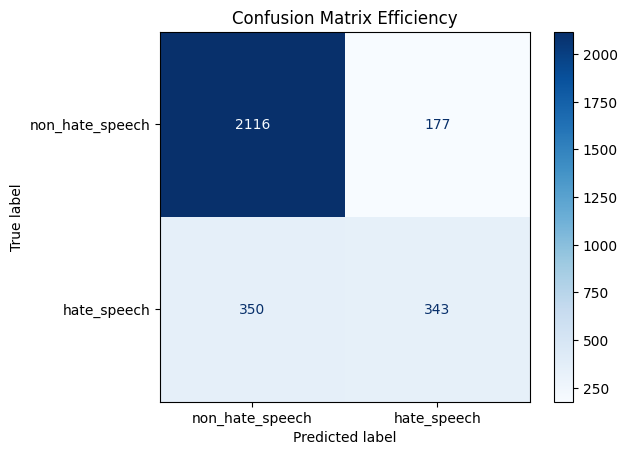

In [ ]:
#confusion matrix
cm = confusion_matrix(true_labels, pred_labels, labels=list(set(true_labels)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(true_labels)))

#plot
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix Efficiency")
plt.show()


Accuracy Efficiency:

2116 + 343 / 2116 + 177 + 350 + 343 = 2459 / 2986 = 0.8235

In [ ]:
texts = ["guapo"]

In [ ]:
nlp = spacy.load("model/model-best")
doc = nlp(texts[0])
print(doc.cats)

{'hate_speech': 0.29505452513694763, 'non_hate_speech': 0.70494544506073}


In [ ]:
texts_2 = ["puto gilipollas"]

In [ ]:
nlp = spacy.load("model/model-best")
doc = nlp(texts_2[0])
print(doc.cats)

{'hate_speech': 0.6378998756408691, 'non_hate_speech': 0.3621000647544861}


# CNN

In [ ]:
!python -m spacy train "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/configs/single_label_cnn.cfg" --paths.train "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/train.spacy"  --paths.dev "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/dev.spacy" --output model --verbose

[2025-04-02 17:56:37,936] [DEBUG] Config overrides from CLI: ['paths.train', 'paths.dev']
ℹ Saving to output directory: model
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2025-04-02 17:56:38,325] [INFO] Set up nlp object from config
[2025-04-02 17:56:38,343] [DEBUG] Loading corpus from path: /content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/dev.spacy
[2025-04-02 17:56:38,346] [DEBUG] Loading corpus from path: /content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/train.spacy
[2025-04-02 17:56:38,346] [INFO] Pipeline: ['textcat']
[2025-04-02 17:56:38,349] [INFO] Created vocabulary
[2025-04-02 17:56:38,350] [INFO] Finished initializing nlp object
[2025-04-02 17:57:06,845] [INFO] Initialized pipeline components: ['textcat']
✔ Initialized pipeline

============================= Training pipeline =============================
[2025-04-02 17:57:06,864] [DEBUG] Loading corpus from path: /content/drive/MyDrive/Colab No

In [ ]:
!python -m spacy evaluate ./model/model-best/ "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/test.spacy"


ℹ Using CPU

================================== Results ==================================

TOK                 99.98
TEXTCAT (macro F)   73.09
SPEED               21640


=========================== Textcat F (per label) ===========================

                      P       R       F
hate_speech       63.28   52.96   57.66
non_hate_speech   86.45   90.71   88.53


======================== Textcat ROC AUC (per label) ========================

                  ROC AUC
hate_speech          0.84
non_hate_speech      0.84



In [ ]:
import spacy
import spacy.tokens
from spacy.tokens import DocBin
import json
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#load trained model
nlp = spacy.load("./model/model-best/")

#load test dataset
test_data_path = "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/test.spacy"
doc_bin = DocBin().from_disk(test_data_path)
docs = list(doc_bin.get_docs(nlp.vocab))

true_labels = []
pred_labels = []

for doc in docs:
    if doc.cats:
        true_label = max(doc.cats, key=doc.cats.get)
        pred_label = max(nlp(doc.text).cats, key=nlp(doc.text).cats.get)

        true_labels.append(true_label)
        pred_labels.append(pred_label)

#Save predictions
output_path = "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/metrics/predictions_CNN.json"
with open(output_path, "w") as f:
    json.dump({"true_labels": true_labels, "pred_labels": pred_labels}, f, indent=4)

print(f"Predictions saved to: {output_path}")


Predictions saved to: /content/drive/MyDrive/Colab Notebooks/FinalProjectApps/metrics/predictions_CNN.json


<Figure size 800x600 with 0 Axes>

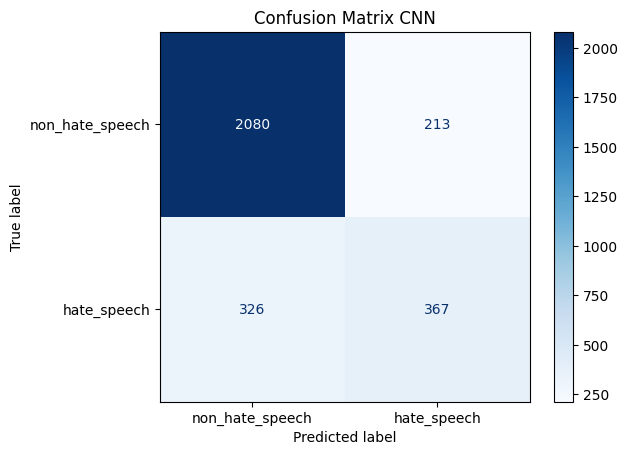

In [ ]:
cm = confusion_matrix(true_labels, pred_labels, labels=list(set(true_labels)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(true_labels)))

#Plot
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix CNN")
plt.show()

Accuracy CNN:

2080 + 367 / 2080 + 367 + 213 + 326 = 2447 / 2986 = 0.8194

In [ ]:
texts = ["guapo"]

In [ ]:
nlp = spacy.load("model/model-best")
doc = nlp(texts[0])
print(doc.cats)

{'hate_speech': 1.198021165981617e-16, 'non_hate_speech': 1.0}


In [ ]:
texts_2 = ["puto gilipollas"]

In [ ]:
nlp = spacy.load("model/model-best")
doc = nlp(texts_2[0])
print(doc.cats)

{'hate_speech': 0.9971854090690613, 'non_hate_speech': 0.0028146179392933846}


# BOW

In [ ]:
!python -m spacy train "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/configs/single_label_bow.cfg" --paths.train "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/train.spacy"  --paths.dev "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/dev.spacy" --output model --verbose

[2025-04-02 18:11:56,410] [DEBUG] Config overrides from CLI: ['paths.train', 'paths.dev']
ℹ Saving to output directory: model
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2025-04-02 18:11:56,784] [INFO] Set up nlp object from config
[2025-04-02 18:11:56,802] [DEBUG] Loading corpus from path: /content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/dev.spacy
[2025-04-02 18:11:56,805] [DEBUG] Loading corpus from path: /content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/train.spacy
[2025-04-02 18:11:56,805] [INFO] Pipeline: ['textcat']
[2025-04-02 18:11:56,808] [INFO] Created vocabulary
[2025-04-02 18:11:56,808] [INFO] Finished initializing nlp object
[2025-04-02 18:12:33,014] [INFO] Initialized pipeline components: ['textcat']
✔ Initialized pipeline

============================= Training pipeline =============================
[2025-04-02 18:12:33,033] [DEBUG] Loading corpus from path: /content/drive/MyDrive/Colab No

In [ ]:
!python -m spacy evaluate ./model/model-best/ "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/test.spacy"

ℹ Using CPU

================================== Results ==================================

TOK                 99.98 
TEXTCAT (macro F)   74.11 
SPEED               135404


=========================== Textcat F (per label) ===========================

                      P       R       F
hate_speech       68.19   51.66   58.78
non_hate_speech   86.39   92.72   89.44


======================== Textcat ROC AUC (per label) ========================

                  ROC AUC
hate_speech          0.85
non_hate_speech      0.85



In [ ]:
import spacy
import spacy.tokens
from spacy.tokens import DocBin
import json
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

#Load trained model
nlp = spacy.load("./model/model-best/")

#Load test dataset
test_data_path = "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/test.spacy"
doc_bin = DocBin().from_disk(test_data_path)
docs = list(doc_bin.get_docs(nlp.vocab))

true_labels = []
pred_labels = []

for doc in docs:
    if doc.cats:
        true_label = max(doc.cats, key=doc.cats.get)
        pred_label = max(nlp(doc.text).cats, key=nlp(doc.text).cats.get)

        true_labels.append(true_label)
        pred_labels.append(pred_label)

output_path = "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/metrics/predictions_BOW.json"
with open(output_path, "w") as f:
    json.dump({"true_labels": true_labels, "pred_labels": pred_labels}, f, indent=4)

print(f"Predictions saved to: {output_path}")

Predictions saved to: /content/drive/MyDrive/Colab Notebooks/FinalProjectApps/metrics/predictions_BOW.json


<Figure size 800x600 with 0 Axes>

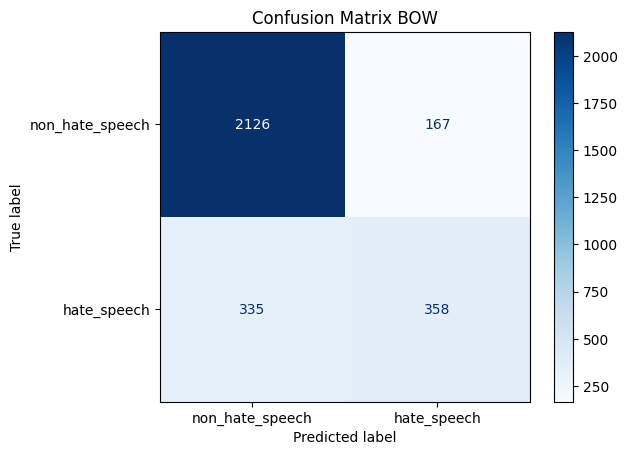

In [ ]:
#confusion matrix
cm = confusion_matrix(true_labels, pred_labels, labels=list(set(true_labels)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(true_labels)))

#plot
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix BOW")
plt.show()

BOW accuracy:

2126 + 358 / 2126 + 358 + 167 + 335 = 2484 / 2986 = 0.8318

In [ ]:
texts = ["guapo"]

In [ ]:
nlp = spacy.load("model/model-best")
doc = nlp(texts[0])
print(doc.cats)

{'hate_speech': 0.3195352852344513, 'non_hate_speech': 0.6804647445678711}


In [ ]:
texts_2 = ["puto gilipollas"]

In [ ]:
nlp = spacy.load("model/model-best")
doc = nlp(texts_2[0])
print(doc.cats)

{'hate_speech': 0.641968846321106, 'non_hate_speech': 0.35803118348121643}


# ENSEMBLE

In [ ]:
!python -m spacy train "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/configs/single_label_ensemble.cfg" --paths.train "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/train.spacy"  --paths.dev "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/dev.spacy" --output model --verbose

[2025-04-02 18:18:33,782] [DEBUG] Config overrides from CLI: ['paths.train', 'paths.dev']
ℹ Saving to output directory: model
ℹ Using CPU

=========================== Initializing pipeline ===========================
[2025-04-02 18:18:34,171] [INFO] Set up nlp object from config
[2025-04-02 18:18:34,190] [DEBUG] Loading corpus from path: /content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/dev.spacy
[2025-04-02 18:18:34,193] [DEBUG] Loading corpus from path: /content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/train.spacy
[2025-04-02 18:18:34,193] [INFO] Pipeline: ['textcat']
[2025-04-02 18:18:34,197] [INFO] Created vocabulary
[2025-04-02 18:18:34,197] [INFO] Finished initializing nlp object
[2025-04-02 18:18:52,395] [INFO] Initialized pipeline components: ['textcat']
✔ Initialized pipeline

============================= Training pipeline =============================
[2025-04-02 18:18:52,428] [DEBUG] Loading corpus from path: /content/drive/MyDrive/Colab No

In [ ]:
!python -m spacy evaluate ./model/model-best/ "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/test.spacy"

ℹ Using CPU

================================== Results ==================================

TOK                 99.98
TEXTCAT (macro F)   73.79
SPEED               28183


=========================== Textcat F (per label) ===========================

                      P       R       F
hate_speech       59.38   60.32   59.84
non_hate_speech   87.95   87.53   87.74


======================== Textcat ROC AUC (per label) ========================

                  ROC AUC
hate_speech          0.84
non_hate_speech      0.84



In [ ]:
import spacy
import spacy.tokens
from spacy.tokens import DocBin
import json
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

nlp = spacy.load("./model/model-best/")

test_data_path = "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/spacyfiles/test.spacy"
doc_bin = DocBin().from_disk(test_data_path)
docs = list(doc_bin.get_docs(nlp.vocab))

true_labels = []
pred_labels = []

for doc in docs:
    if doc.cats:
        true_label = max(doc.cats, key=doc.cats.get)
        pred_label = max(nlp(doc.text).cats, key=nlp(doc.text).cats.get)

        true_labels.append(true_label)
        pred_labels.append(pred_label)

output_path = "/content/drive/MyDrive/Colab Notebooks/FinalProjectApps/metrics/predictions_Ensemble.json"
with open(output_path, "w") as f:
    json.dump({"true_labels": true_labels, "pred_labels": pred_labels}, f, indent=4)

print(f"Predictions saved to: {output_path}")

Predictions saved to: /content/drive/MyDrive/Colab Notebooks/FinalProjectApps/metrics/predictions_Ensemble.json


<Figure size 800x600 with 0 Axes>

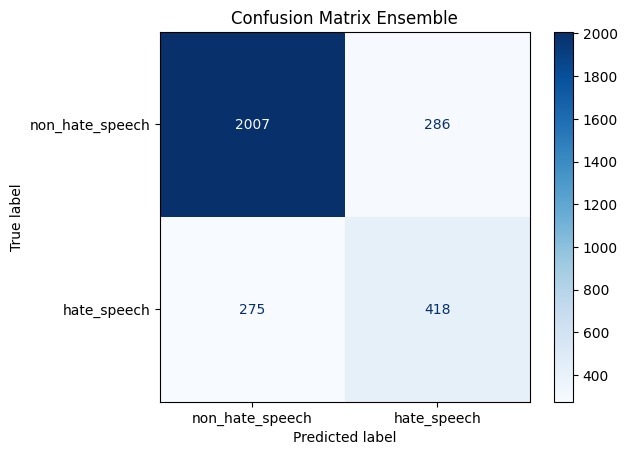

In [ ]:
#confusion matrix
cm = confusion_matrix(true_labels, pred_labels, labels=list(set(true_labels)))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=list(set(true_labels)))

#Plot
plt.figure(figsize=(8, 6))
disp.plot(cmap="Blues", values_format="d")
plt.title("Confusion Matrix Ensemble")
plt.show()

Accuracy Ensemble:

2007 + 428 /2007 + 418 + 275 + 286 = 2435 / 2996 = 0.8127

In [ ]:
texts = ["guapo"]

In [ ]:
nlp = spacy.load("model/model-best")
doc = nlp(texts[0])
print(doc.cats)

{'hate_speech': 0.09387198090553284, 'non_hate_speech': 0.9061280488967896}


In [ ]:
texts_2 = ["puto gilipollas"]

In [ ]:
nlp = spacy.load("model/model-best")
doc = nlp(texts_2[0])
print(doc.cats)

{'hate_speech': 0.9464010000228882, 'non_hate_speech': 0.0535990409553051}
